In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read Data set

In [2]:
df=pd.read_csv("Telecom-Churn.csv")


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='corece')

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
idx = df[df["TotalCharges"].isnull()].index
idx

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [8]:
df=df.drop(idx,axis=0).reset_index()
df

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
df=df.drop(["index"],axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
df=df.drop(['customerID'],axis=1)

In [11]:
col=df.columns[df.dtypes=="object"]

In [12]:
for i in col:
    un = df[i].unique()
    print("{} || {}".format(i,un))

gender || ['Female' 'Male']
Partner || ['Yes' 'No']
Dependents || ['No' 'Yes']
PhoneService || ['No' 'Yes']
MultipleLines || ['No phone service' 'No' 'Yes']
InternetService || ['DSL' 'Fiber optic' 'No']
OnlineSecurity || ['No' 'Yes' 'No internet service']
OnlineBackup || ['Yes' 'No' 'No internet service']
DeviceProtection || ['No' 'Yes' 'No internet service']
TechSupport || ['No' 'Yes' 'No internet service']
StreamingTV || ['No' 'Yes' 'No internet service']
StreamingMovies || ['No' 'Yes' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn || ['No' 'Yes']


# label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.duplicated().sum()

22

In [16]:
df[df.duplicated()]['Churn'].value_counts()

1    12
0    10
Name: Churn, dtype: int64

# Feature scaling

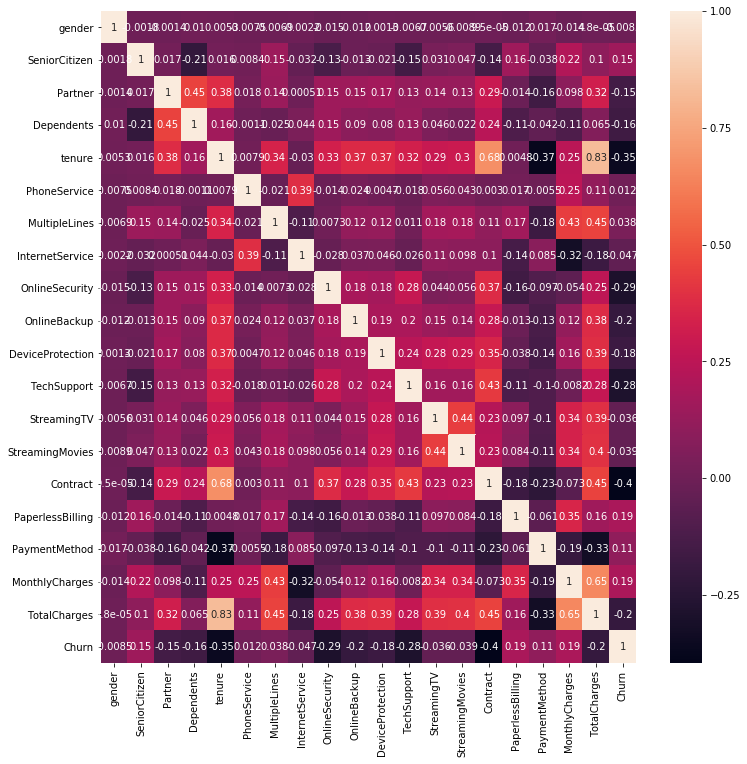

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr()["Churn"].sort_values()

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

In [19]:
# for decision tree features importance 

In [20]:
X=df.drop("Churn",axis=1)
y = df["Churn"]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
model.feature_importances_

array([0.02372396, 0.0184642 , 0.01595873, 0.02249983, 0.11657112,
       0.00080702, 0.01773088, 0.02822735, 0.04522741, 0.01112253,
       0.01883418, 0.01705539, 0.00981698, 0.01156178, 0.16930023,
       0.01683585, 0.03871915, 0.20098227, 0.21656113])

In [24]:
model.feature_names_in_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

In [ ]:
data=pd.DataFrame({'column':model.feature_importances_,"value":model.feature_names_in_})

In [ ]:
data.sort_values('value')

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe=RFE(model,n_features_to_select=12)
fit=rfe.fit(X,y)

In [ ]:
print(fit.n_features_,fit.support_,fit.ranking_)

In [ ]:
fit.get_feature_names_out()

In [ ]:
data = pd.DataFrame({"Column":X.columns,"Ranking":fit.ranking_})

In [ ]:
data[data["Ranking"]>1]

In [ ]:
df.to_csv("Cleaned.csv")